We now have metrics that use the stellar luminosity function maps to compute the errors that will result from stellar crowding.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.maps as maps

In [2]:
# Set up the database connection
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'crowding_test'
resultsDb = db.ResultsDb(outDir=outDir)
nside = 32

For the CrowdingMetric, one sets the acceptable magnitude uncertainty, and the metric finds the magnitude star that will have that uncertainty given the crowding.  

In [3]:
bundleList = []
metric = metrics.CrowdingMetric(crowding_error=0.05)
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = 'filter="r" and night < 730'
plotDict={'colorMin':16., 'colorMax':26.}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
bundleList.append(bundle)

bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  ['opsim_Crowding_To_Precision_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 sqlconstraint now.
monopole: 25.5597  dipole: lon: 65.3946, lat: 26.6861, amp: 3.09284
Plotting complete.


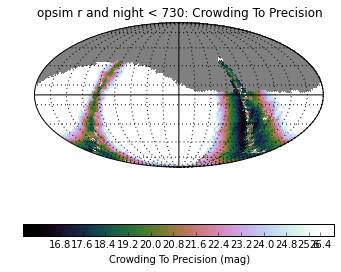

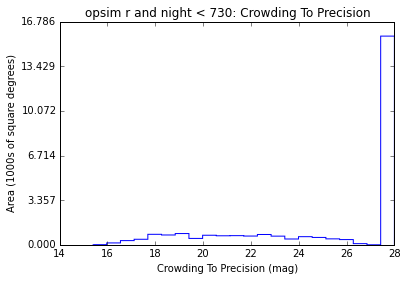

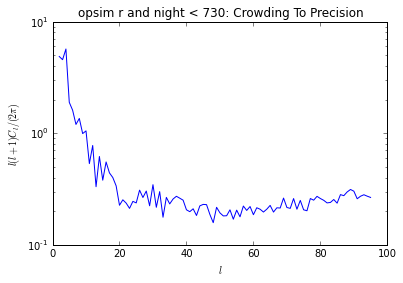

In [4]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

The second metric takes a single stellar magnitude and returns the resulting magnitude uncertainty on it, taking the standard 5-sigma depth or the crowding uncertainty, whichever is larger.

In [5]:
bundleList = []
metric = metrics.CrowdingMagUncertMetric(rmag=20.)
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = 'filter="r" and night < 730'
plotDict={'colorMin':0, 'colorMax':0.05, 'cbformat':'%.1f'}
bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict)
bundleList.append(bundle)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  ['opsim_CrowdingMagUncert_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 sqlconstraint now.
monopole: 0.0136245  dipole: lon: -107.157, lat: -18.1381, amp: 0.0115211
Plotting complete.


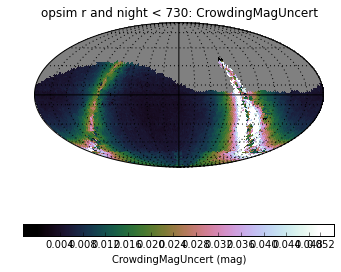

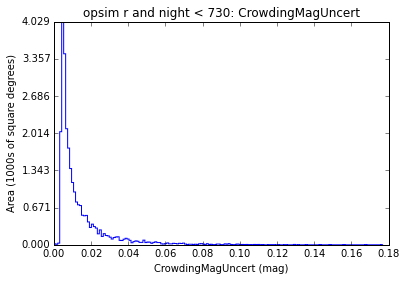

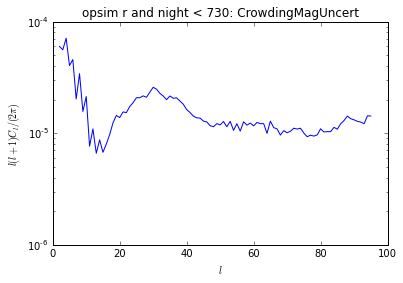

In [6]:
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)